# COMPSCI 371D Homework 10

Write the names of all contributors to this assignment here:

+ ...
+ ...

## Part 1: Classification with Random Decision Forests

In [1]:
import numpy as np
import pickle
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from math import sqrt

def train_tree(samples, problem='classification', splitter='random'):
    classifier = DecisionTreeClassifier if problem == 'classification'\
        else DecisionTreeRegressor
    h = classifier(splitter=splitter)
    return h.fit(samples['x'], samples['y'])

def tree_predict(x, tau):
    return tau.predict(x)

In [2]:
def error_rate(y, predictions, problem='classification'):
    score = (1. - accuracy_score(y, predictions)) * 100 if problem == 'classification'\
        else sqrt(mean_squared_error(y, predictions))
    return score

with open('data.pickle', 'rb') as file:
    data = pickle.load(file)

print('Decision tree classification:')
message = '{}ing error rate with {} splitter is {:.2f} percent'
for splitter in ('best', 'random'):
    %time tree = train_tree(data['train'], splitter=splitter)
    for data_type in ('train', 'test'):
        y_hat = tree_predict(data[data_type]['x'], tree)
        print(message.format(data_type, splitter, error_rate(data[data_type]['y'], y_hat)))

Decision tree classification:
CPU times: user 480 ms, sys: 0 ns, total: 480 ms
Wall time: 480 ms
training error rate with best splitter is 0.00 percent
testing error rate with best splitter is 18.59 percent
CPU times: user 45 ms, sys: 0 ns, total: 45 ms
Wall time: 44.9 ms
training error rate with random splitter is 0.00 percent
testing error rate with random splitter is 18.42 percent


### Problem 1.1 (Exam-Style)

### Problem 1.2 (Exam-Style)

### Problem 1.3

In [3]:
from scipy import stats

def mode(predictions):
    return stats.mode(predictions).mode[0].astype(int)

In [27]:
def generate_samples(samples):
    x = samples['x']
    y = samples['y']
    new_x = []
    new_y = []
    used_indicies = []
    for i in range(len(x)):
        index = np.random.randint(len(x))
        used_indicies.append(index)
        new_x.append(x[index])
        new_y.append(y[index])
    
    used_samples = [False] * len(x)
    for i in used_indicies:
        used_samples[i] = True
    
    return {
        'x': np.asarray(new_x),
        'y': np.asarray(new_y),
        'used_samples': used_samples
    }
        

def train_forest(samples, m=10, problem='classification'):
    forest = []
    all_used_samples = []
    for i in range(m):
        new_samples = generate_samples(samples)
        all_used_samples.append(new_samples['used_samples'])
        forest.append(train_tree(new_samples, problem=problem))
    return forest, np.asarray(all_used_samples)

In [18]:
def forest_predict(x, phi, summary=mode):
    all_pred = []
    for tree in phi:
        all_pred.append(tree_predict(x, tree))
    all_pred = np.asarray(all_pred)
    
    predictions = []
    for col in all_pred.T:
        predictions.append(summary(col))
    
    return np.asarray(predictions)

In [20]:
# forest, used = train_forest(data['train'])
# print('forest:', forest)
# print('used:', used)%

%time forest1 = forest_predict(data['train']['x'],train_forest(data['train'],10,'classification')[0])
%time forest2 = f_p(data['train']['x'],train_forest(data['train'],10,'classification')[0])
print (forest1)
print (forest2)
print (forest1 == forest2)

CPU times: user 4.56 s, sys: 7.88 ms, total: 4.56 s
Wall time: 4.56 s
CPU times: user 4.73 s, sys: 15.9 ms, total: 4.75 s
Wall time: 4.75 s
[3 1 3 ... 2 1 0]
[3 1 3 ... 2 1 0]
[ True  True  True ...  True  True  True]


### Problem 1.4 (Exam-Style)

## Part 2: Regression with Random Decision Forests

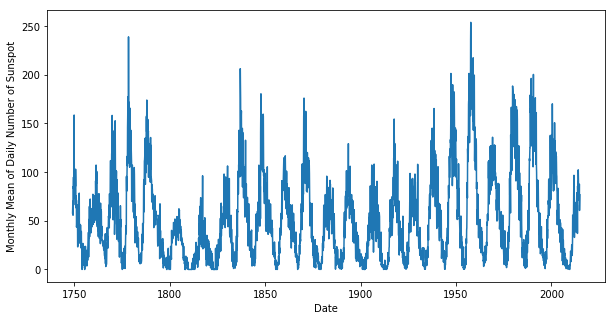

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

with open('sunspots.pickle', 'rb') as file:
    sunspots = pickle.load(file)

plt.figure(figsize=(10, 5))
plt.plot(sunspots['x'], sunspots['y'].flatten())
plt.xlabel('Date')
plt.ylabel('Monthly Mean of Daily Number of Sunspot')
plt.show()

In [58]:
test_fraction = 0.9
training_set, test_set = {}, {}
training_set['x'], test_set['x'], training_set['y'], test_set['y'] = \
    train_test_split(sunspots['x'], sunspots['y'],
                     test_size=test_fraction, random_state=1)

### Problem 2.1

In [24]:
def mean(predictions):
    return np.mean(predictions)

In [33]:
def all_true(arr):
    # checks if each val in an array is true or not
    for a in arr:
        if a == False:
            return False
    return True

def oob_error(phi, samples, used_samples, problem='classification', summary=mode):
    # organize all unused samples    
    x = [] 
    y = []
    for i in range(len(used_samples.T)):
        col = used_samples.T[i]
        if not all_true(col):
            # if a sample is not used on every tree, then it is valid to be an oob sample
            x.append(samples['x'][i])
            y.append(samples['y'][i])
            
    
    # get predictions on unused samples from forest
    predictions = forest_predict(x, phi, summary)
    return error_rate(y, predictions, problem)
    

In [70]:
for i in range(1,21):
    print("Forest with {} tree(s).".format(i))
    phi, unused_samples = train_forest(training_set, m=i, problem='regression')

    # testing error
    test_predictions = forest_predict(test_set['x'], phi, summary=mean)
    test_err = error_rate(test_set['y'], test_predictions, problem='regression')

    # oob error
    oob_err = oob_error(phi, training_set, unused_samples, problem='regression', summary=mean)

    # for all of sunspots[x]
    predictions = forest_predict(sunspots['x'], phi, summary=mean)

Forest with 1 tree(s).
Forest with 2 tree(s).
Forest with 3 tree(s).
Forest with 4 tree(s).
Forest with 5 tree(s).
Forest with 6 tree(s).
Forest with 7 tree(s).
Forest with 8 tree(s).
Forest with 9 tree(s).
Forest with 10 tree(s).
Forest with 11 tree(s).
Forest with 12 tree(s).
Forest with 13 tree(s).
Forest with 14 tree(s).
Forest with 15 tree(s).
Forest with 16 tree(s).
Forest with 17 tree(s).
Forest with 18 tree(s).
Forest with 19 tree(s).
Forest with 20 tree(s).


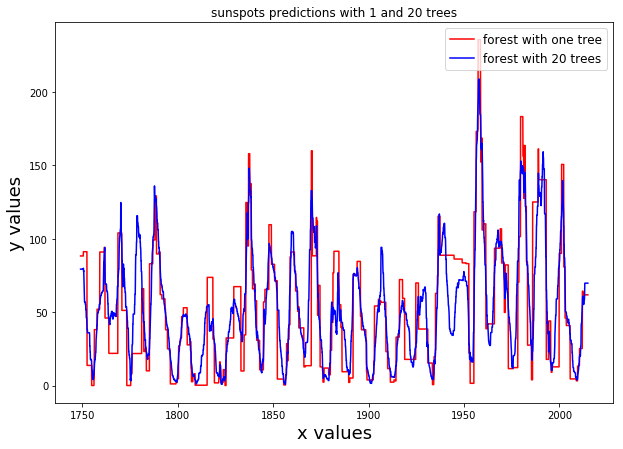

In [71]:
phi_1 = train_forest(training_set, m=1, problem='regression')[0]
phi_20 = train_forest(training_set, m=20, problem='regression')[0]
predictions_1 = forest_predict(sunspots['x'], phi_1, summary=mean)
predictions_20 = forest_predict(sunspots['x'], phi_20, summary=mean)

plt.figure(figsize=(10, 7))
plt.plot(sunspots['x'], predictions_1, color='r',label = "forest with one tree")
plt.plot(sunspots['x'], predictions_20, color='b',label = "forest with 20 trees")
# plt.plot(treenums, error_rates_test, label='error_rates_test')
plt.legend(loc=1, prop={'size': 12})
plt.title("sunspots predictions with 1 and 20 trees")
plt.xlabel('x values', fontsize=18)
plt.ylabel('y values', fontsize=18)
plt.show()

1
This is the error rate for train set of treenum = 1
20.09460617907609
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


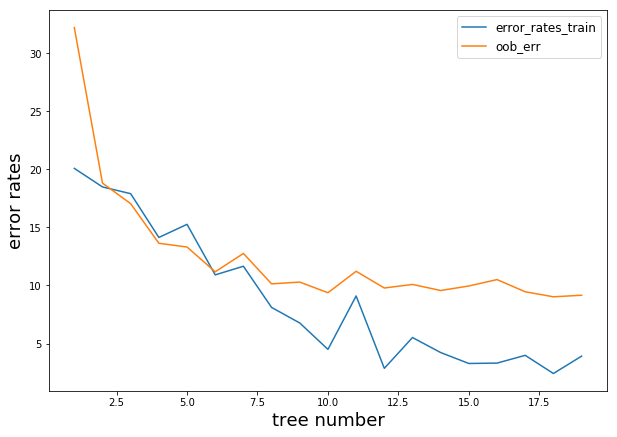

None


In [75]:
def error_plot(samples,maxtree, problem='classifcation'):
    error_rates_train = []
    error_rates_oob = []
    for treenum in range(1,maxtree):
        print(treenum)
        forests, unused_samples = train_forest(samples['train'], m=treenum, problem=problem)
        predictions_train = forest_predict(samples['train']['x'], forests, summary=mode)
        error_rates_train.append(error_rate(samples['train']['y'], predictions_train, problem=problem))
#         predictions_test = forest_predict(samples['test']['x'], forests[0], summary=mode)
#         error_rates_test.append(error_rate(samples['test']['y'], predictions_test, problem=problem))
        oob_err = oob_error(forests, samples['train'], unused_samples, problem='regression', summary=mean)
        error_rates_oob.append(oob_err)

        if treenum == 1:
            print ("This is the error rate for train set of treenum = 1")
            print (error_rate(samples['train']['y'], predictions_train, problem=problem))
#             print ("This is the error rate for test set of treenum = 1")
#             print (error_rate(samples['test']['y'], predictions_test, problem=problem))
        
    treenums = np.arange(1,maxtree).tolist()
    
    plt.figure(figsize=(10, 7))
    plt.plot(treenums, error_rates_train, label='error_rates_train')
    plt.plot(treenums, error_rates_oob, label='oob_err')
    plt.legend(loc=1, prop={'size': 12})
    plt.xlabel('tree number', fontsize=18)
    plt.ylabel('error rates', fontsize=18)
    plt.show()
    
    return 

samples = {
    'train': training_set,
    'test': test_set
}
print (error_plot(samples,20, problem='regression'))

### Problem 2.2 (Exam-Style)

### Problem 2.3

Text(0, 0.5, 'Error Rate')

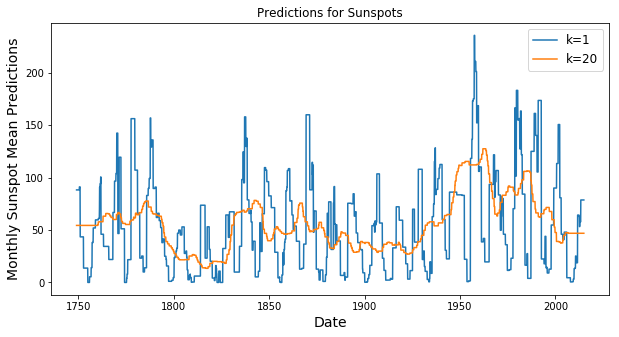

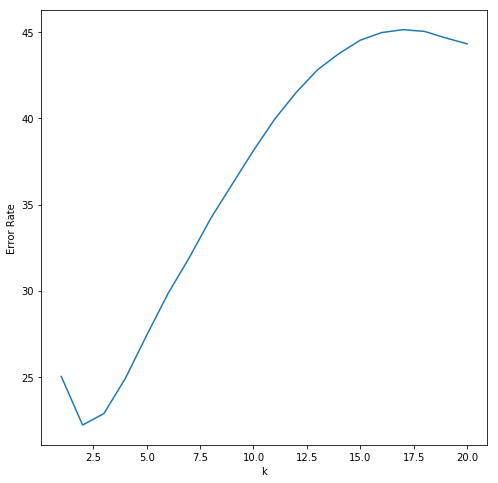

In [80]:
from sklearn.neighbors import KNeighborsRegressor

error_rates = []
y_preds = []
sunspot_preds = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(training_set['x'], training_set['y'])
    y_pred = knn.predict(test_set['x'])
    y_preds.append(y_pred)
    sunspot_pred = knn.predict(sunspots['x'])
    sunspot_preds.append(sunspot_pred)
    error_rates.append(error_rate(test_set['y'], y_pred, problem='regression'))

plt.figure(figsize=(10, 5))
plt.plot(sunspots['x'], sunspot_preds[0],label='k=1')
plt.plot(sunspots['x'], sunspot_preds[19],label='k=20')
plt.legend(loc=1, prop={'size': 12})
plt.xlabel('Date', fontsize=14)
plt.ylabel('Monthly Sunspot Mean Predictions', fontsize=14)
plt.title('Predictions for Sunspots')

plt.figure(figsize=(8, 8))
plt.plot(np.linspace(1, 20, num=20).tolist(), error_rates)
plt.xlabel('k')
plt.ylabel('Error Rate')

### Problem 2.4 (Exam-Style)